#DESAFIO BUSINESS INTELIGENCE 

In [1]:
#importando as bibliotecas
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import random 

In [2]:
#(1)lendo o arquivo .csv - separado por ";"
dados = pd.read_csv("dados.csv", sep=";")

In [3]:
#(1)verificando cabeçalho do dataset principal
dados.head()

,Sistema,Status do Processo,Data Última Distribuição,Assunto Código,Data Primeira Distribuição,Classe Judicial,Órgão Julgador,Parte Polo Ativo?,Parte Polo Passivo?,Parte Outros Participantes?,Data Trânsito Julgado,Tempo em Anos
0,PJe,D,42.969.462.120.486,5571.0,42.968.599.001.736,283,2ª Vara Federal,S,N,N,13/01/2020,2.0
1,PJe,D,42.926.701.227.662,3432.0,42.926.701.227.662,283,14ª Vara Federal,S,N,N,25/09/2019,2.0
2,PJe,D,43.053.375.022.454,3539.0,43.053.375.022.454,283,9ª Vara Federal,S,N,N,23/04/2018,0.0
3,PJe,D,43.502.733.639.676,7792.0,43.742.533.203.368,386,15ª Vara Federal,S,N,N,10/12/2018,3.0
4,PJe,D,425.737.125,3432.0,NaN,283,14ª Vara Federal,S,N,N,15/05/2020,2.0


In [4]:
#(2)identificar Quantos registros tem no dataset
linhasPrincipal = int(format(dados.shape[0]))
colunasPrincipal = int(format(dados.shape[1]))
print('quantidade de registros no dataset:', 
      #tira os dados nulos da quantidade de registros
      (linhasPrincipal*colunasPrincipal)-(dados['Data Primeira Distribuição'].isna().sum())
     )

quantidade de registros no dataset: 6116


In [5]:
#(2)Quantidade de colunas
print('quantidade de colunas no dataset:', format(dados.shape[1]))

quantidade de colunas no dataset: 12


In [6]:
#(2)quantos valores nulos exitem em cada uma das linhas
dados.isnull().sum()

Sistema                         0
Status do Processo              0
Data Última Distribuição        0
Assunto Código                  0
Data Primeira Distribuição     76
Classe Judicial                 0
Órgão Julgador                  0
Parte Polo Ativo?               0
Parte Polo Passivo?             0
Parte Outros Participantes?     0
Data Trânsito Julgado           0
Tempo em Anos                   0
dtype: int64

In [7]:
#(2)valores únicos existentes em cada coluna

df_valoresUnicos= pd.DataFrame()

for cont in range(0,int(format(dados.shape[1]))):
   print(set(dados[dados.columns[cont]]))
   print("")


{'PJe'}

{'D'}

{'42.626.450.159.977', '42.622.554.525.764', '4.315.361.070.419', '4.364.465.061.375', '42.899.743.589.143.900', '43.503.663.843.299', '42.669.425.053.148', '42.933.748.516.308', '43.300.679.193.345', '4.315.764.347.566', '43.003.659.735.197.000', '43.073.736.125.138.900', '42.870.414.637.917.000', '42.149.654.166.667', '42.844.518.506.123', '43.347.553.457.117.900', '42.696.773.156.169', '43.067.633.824.005', '43.444.482.156.528', '42.922.430.647.581', '42.717.726.931.088', '4.308.851.611.919', '43.235.641.411.968', '42.689.356.432.257', '42.759.484.742.361.000', '43.304.603.312.315', '4.301.866.851.059', '43.199.727.943.889', '42.899.723.226.712.900', '4.232.071.875', '43.200.595.288.958', '42.558.559.027.778', '41.774.710.416.667', '42.783.492.628.171', '42.948.469.380.231', '39.195.685.416.667', '43.563.527.447.315', '4.289.237.136.022', '43.006.731.133.992.900', '41.787.707.638.889', '4.218.584.375', '42.642.505.572.557.900', '42.079.746.527.778', '42.326.427.083.3

In [8]:
#(3)criando novo dataset, com valores numericos 
dadosNumericos = pd.DataFrame()

In [9]:
#(3)adicionando os dados ao novo dataset
colunas = ['Assunto Código', 
            'Classe Judicial',
            'Tempo em Anos'
          ]
dadosNumericos = pd.DataFrame(columns=colunas)

#copiando os dados do dataset original para o novo com valores numéricos 
dadosNumericos['Assunto Código'] = dados['Assunto Código'].values
dadosNumericos['Classe Judicial'] = dados['Classe Judicial'].values
dadosNumericos['Tempo em Anos'] = dados['Tempo em Anos'].values


In [10]:
#(3)verificando se os dados foram inseridos corretamente no novo dataset com valores numéricos
dadosNumericos.head()

,Assunto Código,Classe Judicial,Tempo em Anos
0,5571.0,283,2.0
1,3432.0,283,2.0
2,3539.0,283,0.0
3,7792.0,386,3.0
4,3432.0,283,2.0


In [11]:
#(3)criar dataframe com os dados estatísticos com o dataset de valores numéricos 

df_estatisticas = pd.DataFrame()

#adicionado as colunas
colunas_df_estatisticas = [ 'Coluna',
                            'Média', 
                            'Mediana',
                            'Desvio Padrão'
          ]


#criando as linhs da coluna Assunto Código
linhas_df_AssuntoCodigo = pd.Series(
                    
                    ["Assunto Código", round(dadosNumericos['Assunto Código'].mean(), 2),
                                            round(dadosNumericos['Assunto Código'].median(), 2),
                                                 round(statistics.stdev(dadosNumericos['Assunto Código']), 2)  
                                     
                                   
                                    ])

#criando as linhas da colunas Tempo em anos
linhas_df_TempoemAnos = pd.Series(
    
                    ["Tempo em Anos", round(dadosNumericos['Tempo em Anos'].mean(), 2),
                                          round(dadosNumericos['Tempo em Anos'].median(), 2),
                                            round(statistics.stdev(dadosNumericos['Tempo em Anos']), 2)  
                                    
                                   ])


#criando as linhas da colunas Classe Judicial
linhas_df_ClasseJudicial = pd.Series(
                    
                    ["Classe Judicial", round(dadosNumericos['Classe Judicial'].mean(), 2),
                                            round(dadosNumericos['Classe Judicial'].median(), 2),
                                               round(statistics.stdev(dadosNumericos['Classe Judicial']), 2)  
                                    ])

#adcionando as linhas e colunas ao novo dataset
df_estatisticas = pd.DataFrame([list(linhas_df_AssuntoCodigo), 
                                    list(linhas_df_ClasseJudicial), 
                                        list(linhas_df_TempoemAnos)], 
                                               columns= colunas_df_estatisticas
                              )


In [12]:
#(3)imprimir dados estatísticos 

df_estatisticas

,Coluna,Média,Mediana,Desvio Padrão
0,Assunto Código,5473.17,3637.0,2435.63
1,Classe Judicial,372.64,283.0,681.00
2,Tempo em Anos,3.91,3.0,3.78


In [13]:
#(4)removendo as duas últimas colunas do dataset com dados estatísticos 
dadosNumericos.drop('Classe Judicial', axis=1, inplace=True)
dadosNumericos.drop('Tempo em Anos', axis=1, inplace=True)

In [14]:
#(4)exibindo o dataset com dados estatísticos atualizado
dadosNumericos

,Assunto Código
0,5571.0
1,3432.0
2,3539.0
3,7792.0
4,3432.0
...,...
511,3533.0
512,3432.0
513,3596.0
514,5836.0


In [15]:
#(5)método com número aleatório k de linhas

class aleatorio:
    
    #metodo definido e usando o random para o número aleatório
    def k(a):
        return random.randrange(1,int(a))
    
    
    

In [16]:
#(5)chamada de exemplo do método com número aleatório que define a quantidade de linhas do dataset

TotalLinhasDados = int(format(dados.shape[0]))
dados.iloc[0:int(aleatorio.k(TotalLinhasDados)),:]
                        

,Sistema,Status do Processo,Data Última Distribuição,Assunto Código,Data Primeira Distribuição,Classe Judicial,Órgão Julgador,Parte Polo Ativo?,Parte Polo Passivo?,Parte Outros Participantes?,Data Trânsito Julgado,Tempo em Anos
0,PJe,D,42.969.462.120.486,5571.0,42.968.599.001.736,283,2ª Vara Federal,S,N,N,13/01/2020,2.0
1,PJe,D,42.926.701.227.662,3432.0,42.926.701.227.662,283,14ª Vara Federal,S,N,N,25/09/2019,2.0
2,PJe,D,43.053.375.022.454,3539.0,43.053.375.022.454,283,9ª Vara Federal,S,N,N,23/04/2018,0.0
3,PJe,D,43.502.733.639.676,7792.0,43.742.533.203.368,386,15ª Vara Federal,S,N,N,10/12/2018,3.0
4,PJe,D,425.737.125,3432.0,NaN,283,14ª Vara Federal,S,N,N,15/05/2020,2.0
5,PJe,D,43.200.595.288.958,7787.0,43.166.670.280.359,386,14ª Vara Federal,S,N,N,28/09/2017,1.0
6,PJe,D,43.125.655.311.053,5566.0,43.844.362.003.229,283,11ª Vara Federal,S,N,N,23/09/2019,9.0
7,PJe,D,42.558.559.027.778,5566.0,NaN,283,15ª Vara Federal,S,N,N,20/03/2018,4.0
8,PJe,D,42.531.713.888.889,5566.0,NaN,283,14ª Vara Federal,S,N,N,27/02/2020,9.0
9,PJe,D,42.194.729.166.667,3548.0,09/07/2015 17:30,283,14ª Vara Federal,S,N,N,01/08/2018,2.0


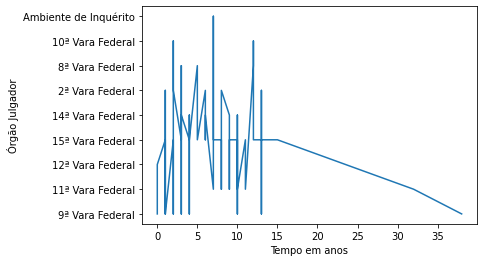

In [17]:
#(6)gráfico de linha por Orgão Julgador e Tempo em Anos

#ordenando a coluna Tempo em anos em ordem crescente
dados.sort_values(by='Tempo em Anos', ascending=True, inplace=True)
plt.plot(dados['Tempo em Anos'], dados['Órgão Julgador'])

#dando títulos aos eixos x e y
plt.ylabel('Órgão Julgador')
plt.xlabel('Tempo em anos')

#exibindo o gráfico
plt.show()